<a href="https://colab.research.google.com/github/aks3213/009_AkshayBhanderi/blob/main/Lab_03_digits_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

# naive and gaussian model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

# for accuracy
from sklearn import metrics

# print precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_digits

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


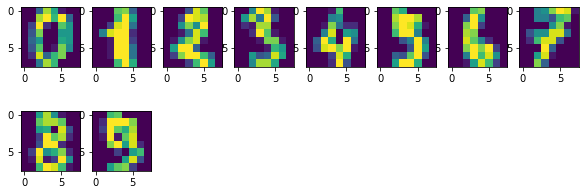

In [5]:
# Loading digits dataset from sklearn module

main_data = load_digits()

plt.figure(figsize = (10,15))

for i in range(10):
    plt.subplot(8, 8, i + 1)
    plt.imshow(main_data.images[i])

In [6]:
#spliting  training test 80% - 20%

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(main_data.data, main_data.target, test_size = 0.20, random_state = 48)

In [7]:
# Gaussina models

gnb = GaussianNB()

# train model
gnb.fit(X_train, Y_train)

# training completed
Y_predicted = gnb.predict(X_test)

print(f"Accuracy :- {metrics.accuracy_score(Y_test, Y_predicted)}")

Accuracy :- 0.8333333333333334


In [8]:
main_data.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

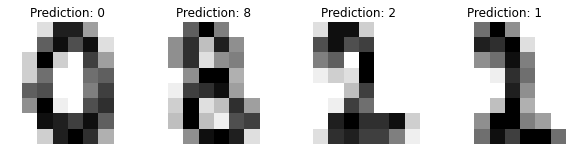

In [13]:
#true pridiction

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, Y_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [11]:

print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")

Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.66      0.95      0.78        43
           2       0.91      0.76      0.83        42
           3       0.89      0.76      0.82        33
           4       0.94      0.77      0.85        44
           5       0.94      0.71      0.81        24
           6       0.91      0.95      0.93        43
           7       0.68      1.00      0.81        25
           8       0.69      0.68      0.68        40
           9       0.92      0.77      0.84        30

    accuracy                           0.83       360
   macro avg       0.86      0.83      0.83       360
weighted avg       0.86      0.83      0.83       360




Confusion matrix:
[[35  1  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  2  0]
 [ 0  2 32  1  0  0  2  0  5  0]
 [ 0  1  3 25  0  0  0  0  3  1]
 [ 0  3  0  0 34  0  1  5  1  0]
 [ 0  2  0  1  0 17  0  3  0  1]
 [ 0  1  0  0  1  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0]
 [ 0  8  0  1  0  0  0  4 27  0]
 [ 0  3  0  0  1  1  1  0  1 23]]


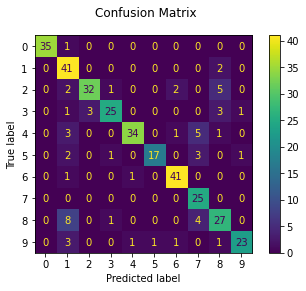

In [12]:
disp = metrics.plot_confusion_matrix(gnb, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()